In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point

,NAME_1,geometry
0,Alabama,"MULTIPOLYGON (((-88.11320 30.22623, -88.11291 ..."
1,Alaska,"MULTIPOLYGON (((-141.31459 60.05416, -141.3125..."
2,Arizona,"POLYGON ((-110.53930 37.00423, -110.47991 37.0..."
3,Arkansas,"POLYGON ((-93.36903 36.49686, -93.36530 36.496..."
4,California,"MULTIPOLYGON (((-117.23285 32.77641, -117.2330..."


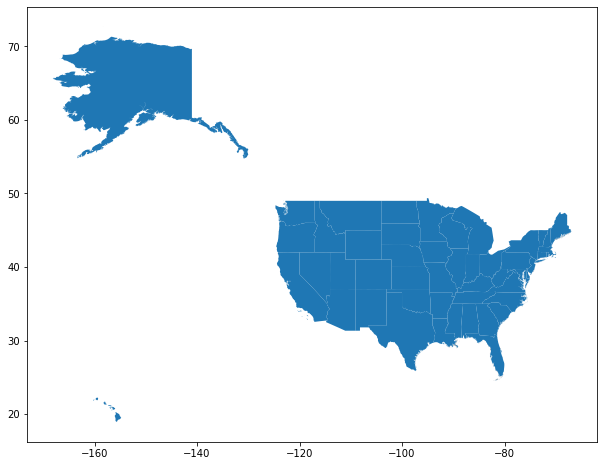

In [6]:
airports_data = pd.read_csv('us_airports.csv')

# Importing US states ESRI shapefile and checking its crs
us_states = gpd.read_file('us_states.shp')
us_states.plot(figsize = (12, 8))
us_states.head()

In [3]:
# Create Point Geometries using Point - the order of lon and lat is essential
geometry = [Point(xy) for xy in zip(airports_data['LONGITUDE'], airports_data['LATITUDE'])]

In [4]:
# Create a new Geopandas GeoDataFrame with the same crs as the base map - US states
airports_us = gpd.GeoDataFrame(airports_data, geometry = geometry, crs = us_states.crs)

,AIRPORT,geometry
0,Albuquerque International,POINT (-106.60919 35.04022)
1,Ted Stevens Anchorage International,POINT (-149.99619 61.17432)
2,William B Hartsfield-Atlanta Intl,POINT (-84.42694 33.64044)
3,Austin-Bergstrom International,POINT (-97.66987 30.19453)
4,Bradley International,POINT (-72.68323 41.93887)


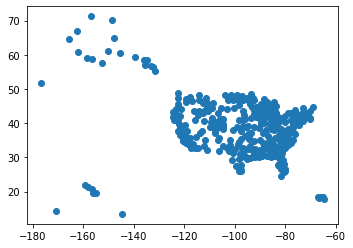

In [10]:
# Truncating airports_us

airports_us = airports_us[['AIRPORT', 'geometry']]
airports_us.plot()

airports_us.head()

<AxesSubplot:>

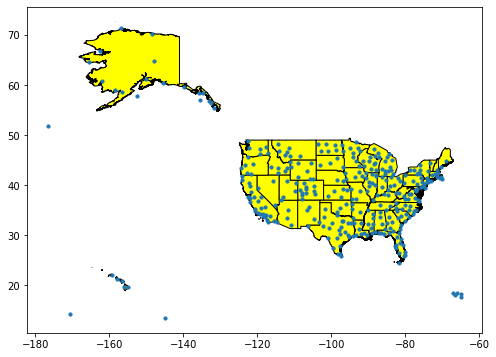

In [12]:
fig, ax = plt.subplots(figsize = (12, 6))
us_states.plot(ax = ax, color ='yellow', edgecolor = 'black') # base layer
airports_us.plot(ax = ax, markersize = 10)

In [ ]:
# Spatial join depends on spatial locations
airports_us = gpd.sjoin(airports_us, us_states, how = 'inner', op = 'intersects')

In [16]:
airports_us.head()

,AIRPORT,geometry,index_right,NAME_1
0,Albuquerque International,POINT (-106.60919 35.04022),31,New Mexico
196,Lea County Regional,POINT (-103.21703 32.68753),31,New Mexico
295,Roswell Industrial Air Center,POINT (-104.53056 33.30156),31,New Mexico
297,Santa Fe Municipal,POINT (-106.08814 35.61678),31,New Mexico
1,Ted Stevens Anchorage International,POINT (-149.99619 61.17432),1,Alaska


<AxesSubplot:>

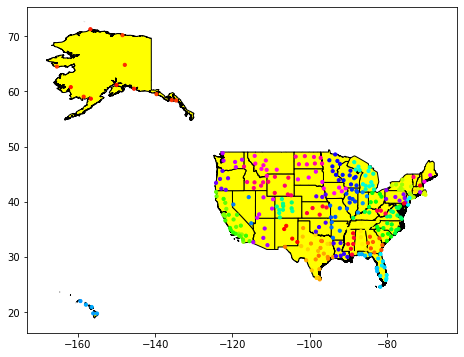

In [21]:
fig, ax = plt.subplots(figsize = (12, 6))
us_states.plot(ax = ax, color ='yellow', edgecolor = 'black') # base layer
airports_us.plot(ax = ax, markersize = 10, cmap = 'hsv')